# # Reconnaissance d'expressions faciales avec CNN
# 
# Ce notebook entraîne un modèle CNN en utilisant TensorFlow/Keras pour classifier les images d'expressions faciales.
# 

In [3]:
!pip install matplotlib


import os
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


In [4]:

# Définition des chemins d'accès
train_dir = r"C:\Users\smour\Documents\HACKATHON\hackaton2025\archive\train"
test_dir = r"C:\Users\smour\Documents\HACKATHON\hackaton2025\archive\test"

# Paramètres
img_width, img_height = 48, 48  # taille typique pour FER (ex: FER-2013)
batch_size = 32
epochs = 30
num_classes = len(os.listdir(train_dir))  # supposez que chaque sous-dossier représente une classe

# Préparation des générateurs d'images
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(
    rescale=1./255
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

validation_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)



Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [6]:
# Construction du modèle CNN
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()



Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 46, 46, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 21, 21, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 356,423 (1.36 MB)

 Trainable params: 356,423 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
# Définition des callbacks
callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)
]

# Entraînement du modèle
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    callbacks=callbacks
)


Epoch 1/30
897/897 ━━━━━━━━━━━━━━━━━━━━ 0s 461ms/step - accuracy: 0.2389 - loss: 1.8312

c:\Users\smour\Documents\HACKATHON\.conda\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


897/897 ━━━━━━━━━━━━━━━━━━━━ 510s 567ms/step - accuracy: 0.2389 - loss: 1.8311 - val_accuracy: 0.3047 - val_loss: 1.7124
Epoch 2/30
  1/897 ━━━━━━━━━━━━━━━━━━━━ 17s 19ms/step - accuracy: 0.2500 - loss: 1.6764

c:\Users\smour\Documents\HACKATHON\.conda\lib\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


897/897 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.2500 - loss: 1.6764 - val_accuracy: 0.3034 - val_loss: 1.7121
Epoch 3/30
896/897 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.2921 - loss: 1.7385

897/897 ━━━━━━━━━━━━━━━━━━━━ 57s 63ms/step - accuracy: 0.2921 - loss: 1.7385 - val_accuracy: 0.3832 - val_loss: 1.6020
Epoch 4/30
  1/897 ━━━━━━━━━━━━━━━━━━━━ 26s 30ms/step - accuracy: 0.3750 - loss: 1.6676

897/897 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.3750 - loss: 1.6676 - val_accuracy: 0.3855 - val_loss: 1.6004
Epoch 5/30
896/897 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.3472 - loss: 1.6434

897/897 ━━━━━━━━━━━━━━━━━━━━ 57s 63ms/step - accuracy: 0.3472 - loss: 1.6434 - val_accuracy: 0.4298 - val_loss: 1.4735
Epoch 6/30
897/897 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.4375 - loss: 1.4857 - val_accuracy: 0.4275 - val_loss: 1.4775
Epoch 7/30
897/897 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.3916 - loss: 1.5587

897/897 ━━━━━━━━━━━━━━━━━━━━ 57s 63ms/step - accuracy: 0.3916 - loss: 1.5587 - val_accuracy: 0.4644 - val_loss: 1.3849
Epoch 8/30
897/897 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.4062 - loss: 1.3429 - val_accuracy: 0.4625 - val_loss: 1.3870
Epoch 9/30
896/897 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.4308 - loss: 1.4831

897/897 ━━━━━━━━━━━━━━━━━━━━ 49s 54ms/step - accuracy: 0.4308 - loss: 1.4830 - val_accuracy: 0.4927 - val_loss: 1.3257
Epoch 10/30
897/897 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5000 - loss: 1.4891 - val_accuracy: 0.4916 - val_loss: 1.3275
Epoch 11/30
897/897 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.4422 - loss: 1.4491

897/897 ━━━━━━━━━━━━━━━━━━━━ 59s 65ms/step - accuracy: 0.4422 - loss: 1.4491 - val_accuracy: 0.4870 - val_loss: 1.3040
Epoch 12/30
  1/897 ━━━━━━━━━━━━━━━━━━━━ 22s 25ms/step - accuracy: 0.5938 - loss: 1.1787

897/897 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.5938 - loss: 1.1787 - val_accuracy: 0.4888 - val_loss: 1.2979
Epoch 13/30
897/897 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.4598 - loss: 1.4020

897/897 ━━━━━━━━━━━━━━━━━━━━ 57s 64ms/step - accuracy: 0.4599 - loss: 1.4020 - val_accuracy: 0.5162 - val_loss: 1.2599
Epoch 14/30
  1/897 ━━━━━━━━━━━━━━━━━━━━ 20s 23ms/step - accuracy: 0.5312 - loss: 1.3393

897/897 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.5312 - loss: 1.3393 - val_accuracy: 0.5173 - val_loss: 1.2587
Epoch 15/30
897/897 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.4782 - loss: 1.3781

897/897 ━━━━━━━━━━━━━━━━━━━━ 59s 66ms/step - accuracy: 0.4782 - loss: 1.3781 - val_accuracy: 0.5186 - val_loss: 1.2580
Epoch 16/30
897/897 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.4375 - loss: 1.5040 - val_accuracy: 0.5187 - val_loss: 1.2612
Epoch 17/30
897/897 ━━━━━━━━━━━━━━━━━━━━ 44s 49ms/step - accuracy: 0.4765 - loss: 1.3648 - val_accuracy: 0.4997 - val_loss: 1.2973
Epoch 18/30
897/897 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.5312 - loss: 1.3553 - val_accuracy: 0.5027 - val_loss: 1.2876
Epoch 19/30
896/897 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.4894 - loss: 1.3337

897/897 ━━━━━━━━━━━━━━━━━━━━ 57s 64ms/step - accuracy: 0.4894 - loss: 1.3338 - val_accuracy: 0.5248 - val_loss: 1.2297
Epoch 20/30
897/897 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4062 - loss: 1.3067 - val_accuracy: 0.5244 - val_loss: 1.2302
Epoch 21/30
896/897 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.4900 - loss: 1.3385

897/897 ━━━━━━━━━━━━━━━━━━━━ 44s 49ms/step - accuracy: 0.4900 - loss: 1.3385 - val_accuracy: 0.5272 - val_loss: 1.2283
Epoch 22/30
897/897 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4375 - loss: 1.2786 - val_accuracy: 0.5264 - val_loss: 1.2295
Epoch 23/30
897/897 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.4908 - loss: 1.3330

897/897 ━━━━━━━━━━━━━━━━━━━━ 50s 55ms/step - accuracy: 0.4908 - loss: 1.3330 - val_accuracy: 0.5384 - val_loss: 1.2177
Epoch 24/30
897/897 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.5312 - loss: 1.2372 - val_accuracy: 0.5378 - val_loss: 1.2221
Epoch 25/30
897/897 ━━━━━━━━━━━━━━━━━━━━ 46s 51ms/step - accuracy: 0.4996 - loss: 1.3145 - val_accuracy: 0.5251 - val_loss: 1.2386
Epoch 26/30
897/897 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.5312 - loss: 1.2188 - val_accuracy: 0.5257 - val_loss: 1.2389
Epoch 27/30
896/897 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.4997 - loss: 1.3052

897/897 ━━━━━━━━━━━━━━━━━━━━ 46s 52ms/step - accuracy: 0.4997 - loss: 1.3052 - val_accuracy: 0.5378 - val_loss: 1.2078
Epoch 28/30
897/897 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5625 - loss: 1.3453 - val_accuracy: 0.5382 - val_loss: 1.2081
Epoch 29/30
896/897 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.5045 - loss: 1.2916

897/897 ━━━━━━━━━━━━━━━━━━━━ 44s 49ms/step - accuracy: 0.5045 - loss: 1.2916 - val_accuracy: 0.5477 - val_loss: 1.1742
Epoch 30/30
  1/897 ━━━━━━━━━━━━━━━━━━━━ 16s 19ms/step - accuracy: 0.4062 - loss: 1.3154

897/897 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.4062 - loss: 1.3154 - val_accuracy: 0.5492 - val_loss: 1.1727


In [8]:

# Évaluation du modèle
loss, accuracy = model.evaluate(validation_generator, steps=validation_generator.samples // batch_size)
print(f"Validation loss: {loss:.4f}")
print(f"Validation accuracy: {accuracy:.4f}")



224/224 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.4784 - loss: 1.3094
Validation loss: 1.1727
Validation accuracy: 0.5492


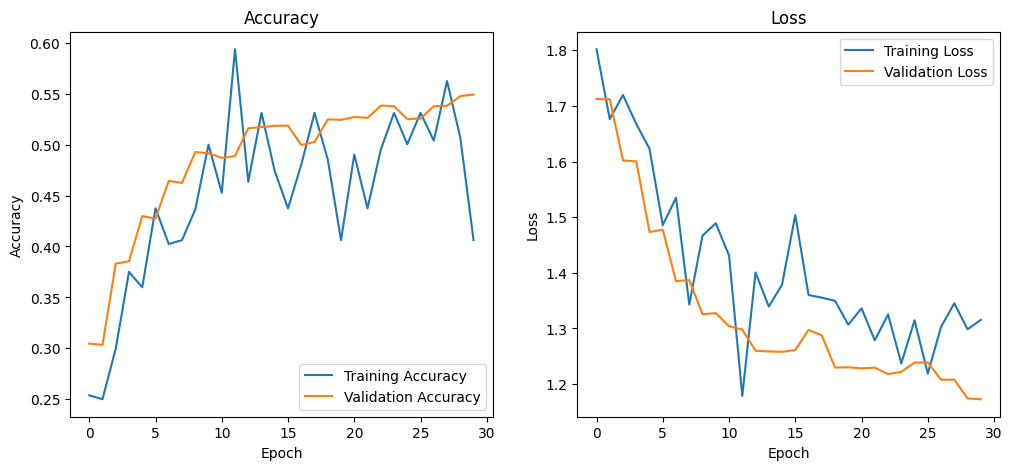

In [9]:
# Visualisation de l'évolution de l'entraînement
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
